## ENG07086 - Termodinâmica e Transferência de Calor
### Exercício Computacional 2 (Unidade 4)- Ciclo Térmico com Reaquecimento

#### Um ciclo de Rankine utiliza água como fluido de trabalho. O vapor deixa a caldeira e entra na turbina a 10 bar e 400°C. O vapor passa então pela turbina, expandindo até a pressão atmosférica. A instalação está esquematizada no diagrama abaixo. Determine o rendimento do ciclo.

<img src="Imagem Ciclo sem Reaquecimento.png">
Ciclo de Rankine


In [1]:
# Carregando os pacotes do Python
import numpy as np

In [2]:
# Importando as bibliotecas do CoolProp
import CoolProp as CP
from CoolProp.CoolProp import PropsSI
# Selecionando o fluido
fluido = 'Water'

In [3]:
# Informações do ciclo:
P3 = 10. # bar, pressão na saída da caldeira
T3 = 400 # °C, temperatura na saída da caldeira
P4 = 1. # bar, pressão na saída do primeiro estágio da turbina

In [4]:
def pegapropriedades(Pressure = None, Temperature = None, Fluido = None):
    
    # Importando as bibliotecas do CoolProp
    # import CoolProp as CP
    # from CoolProp.CoolProp import PropsSI
    
    # Rotina para extrair informações do estado
    # Pressão de entrada em bar, temperatura de entrada em ºC
    # Entalpia e entropia em kJ/kg
    
    if not Temperature: # Fluido saturado - um grau de liberdade
        T = PropsSI('T', 'P', Pressure*1e5, 'Q', 0, Fluido)
        temperature = T
        slat = PropsSI('S', 'P', Pressure*1e5, 'Q', 0, Fluido) / 1000 # entropia do liquido saturado em kJ/kg/K
        svat = PropsSI('S', 'P', Pressure*1e5, 'Q', 1, Fluido) / 1000 # entropia do vapor saturado em kJ/kg/K
        entropy = [slat, svat]

        hlat = PropsSI('H', 'P', Pressure*1e5, 'Q', 0, Fluido) / 1000 # entalpia do liquido saturado em kJ/kg
        hvat = PropsSI('H', 'P', Pressure*1e5, 'Q', 1, Fluido) / 1000 # entalpia do vapor saturado em kJ/kg

        enthalpy = [hlat, hvat]
    
    else:
        temperature = Temperature + 273.15
        entropy = PropsSI('S', 'P', Pressure*1e5, 'T', temperature, Fluido)/1000. #kJ/kg/K
        enthalpy = PropsSI('H', 'P', Pressure*1e5, 'T', temperature, Fluido)/1000. #kJ/kg

    return enthalpy, entropy, temperature 

### Determinação dos estados intermediários no ciclo

In [5]:
# Ponto 3
[h3, s3, T3K] = pegapropriedades(P3, T3, fluido)
print('XXX Ponto 3')
print(f'Temperature {T3K-273.15:0.2f} ºC')
print(f'Pressao {P3:0.2f} bar')
print(f'Entalpia específica {h3:0.2f} kJ/kg')
print(f'Entropia específica {s3:0.2f} kJ/kg/K')



XXX Ponto 3
Temperature 400.00 ºC
Pressao 10.00 bar
Entalpia específica 3264.47 kJ/kg
Entropia específica 7.47 kJ/kg/K


In [6]:
# Ponto 4

h4sat, s4sat, T4K = pegapropriedades(Pressure=P4, Fluido=fluido)
s4 = s3
beta4 = (s4 - s4sat[0]) / (s4sat[1] - s4sat[0])
if beta4 > 1:
    print('Fração vaporizada no ponto 4 maior que 1')
    print('Teclado não reconhecido. Pressione qualquer tecla para proseeguir')
    h4 = PropsSI('H', 'P', P4*1e5, 'S', s4*1000, fluido)/1000. # kJ/kg
else:
    h4 = (1.0 - beta4)*h4sat[0] + beta4*h4sat[1]
print('XXX Ponto 4')
print(f'Temperature {T4K-273.15:0.2f} ºC')
print(f'Pressao {P4:0.2f} bar')
print(f'Entalpia específica {h4:0.2f} kJ/kg')
print(f'Entropia específica {s4:0.2f} kJ/kg/K')




Fração vaporizada no ponto 4 maior que 1
Teclado não reconhecido. Pressione qualquer tecla para proseeguir
XXX Ponto 4
Temperature 99.61 ºC
Pressao 1.00 bar
Entalpia específica 2716.32 kJ/kg
Entropia específica 7.47 kJ/kg/K


In [7]:
# Cálculo do trabalho total produzido pela turbina
wt = (h4 - h3)
print("Trabalho específico total gerado pela turbina: " + str(round(abs(wt),2)) + " kJ/kg")

Trabalho específico total gerado pela turbina: 548.16 kJ/kg


In [8]:
# Ponto 1 (Líquido saturado)
P1 = P4
d1 = PropsSI('D', 'P', P1*1e5, 'Q', 0, fluido) # kg/m³
h1 = PropsSI('H', 'P', P1*1e5, 'Q', 0, fluido)/1000 # kJ/kg
s1 = PropsSI('S', 'P', P1*1e5, 'Q', 0, fluido)/1000 # kJ/kg/K

print('XXX Ponto 1')
print(f'Pressao {P1:0.2f} bar')
print(f'Entalpia específica {h1:0.2f} kJ/kg')
print(f'Entropia específica {s1:0.2f} kJ/kg/K')


XXX Ponto 1
Pressao 1.00 bar
Entalpia específica 417.50 kJ/kg
Entropia específica 1.30 kJ/kg/K


In [9]:
# Ponto 2

P2 = P3
s2 = s1

h2 = PropsSI('H', 'P', P2*1e5, 'S', s2*1000, fluido)/1000. # kJ/kg
s2 = PropsSI('S', 'P', P2*1e5, 'S', s2*1000, fluido) # kJ/kg/K

print('XXX Ponto 2')
print(f'Pressao {P2:0.2f} bar')
print(f'Entalpia específica {h2:0.2f} kJ/kg')
print(f'Entropia específica {s2:0.2f} kJ/kg/K')


XXX Ponto 2
Pressao 10.00 bar
Entalpia específica 418.44 kJ/kg
Entropia específica 1302.76 kJ/kg/K


In [10]:
# Cálculo do trabalho da bomba
wb = h2 - h1
print("Trabalho da bomba: " + str(round(wb,2)) + " kJ/kg")
print("Compare com o método simplificado: " + str(round((P2 - P1)/d1*1e2,2)) + " kJ/kg")

Trabalho da bomba: 0.94 kJ/kg
Compare com o método simplificado: 0.94 kJ/kg


In [11]:
# Cálculos do trabalho líquido e rendimento
wliq = abs(wt) - abs(wb)
print("Trabalho específico líquido produzido pelo ciclo: " + str(round(wliq,2)) + " kJ/kg")
qq = h3 - h2
print("Calor absorvido pelo ciclo na caldeira: " + str(round(qq,2)) + " kJ/kg")
rend = wliq/qq
print("Rendimendo percentual do ciclo: " + str(round(100*rend,2)) + "%")

Trabalho específico líquido produzido pelo ciclo: 547.22 kJ/kg
Calor absorvido pelo ciclo na caldeira: 2846.03 kJ/kg
Rendimendo percentual do ciclo: 19.23%


### Resolvendo agora iterativamente para um arquivo de dados

In [12]:
# Definindo a função de rendimento
def rendimento(P3, T3, P1):
    
    # Importando as bibliotecas do CoolProp
    import CoolProp as CP
    from CoolProp.CoolProp import PropsSI
    # Selecionando o fluido
    fluido = 'Water'
    # Carregando os pacotes do Python
    import numpy as np
    
    # Ponto 3
    [h3, s3, T3k] = pegapropriedades(Pressure = P3, Temperature = T3, Fluido = fluido)
    # Ponto 4
    [h4sat, s4sat, T4K] = pegapropriedades(Pressure = P4, Fluido = fluido)
    s4 = s3
    beta4 = (s4 - s4sat[0])/(s4sat[1] - s4sat[0])
    if beta4 > 1.0:
        h4 = PropsSI('H', 'P', P4*1e5, 'S', s4*1000, fluido)/1000.
    else:
        h4 = (1.-beta4)*h4sat[0] + beta4*h4sat[1]
    P1 = P4
    # Ponto 1
    d1 = PropsSI('D','P',1e5*P1,'Q',0,fluido) # em kg/m^3
    h1 = PropsSI('H','P',1e5*P1,'Q',0,fluido)/1000. # em kJ/kg
    s1 = PropsSI('S','P',1e5*P1,'Q',0,fluido)/1000. # em kJ/kg/K
    # Ponto 2
    P2 = P3
    h2 = PropsSI('H','P',1e5*P2,'S',s1*1e3,fluido)/1000. # em kJ/kg
    # Cálculo do trabalho da bomba
    wb = h2 - h1
    # Cálculo do trabalho total produzido pela turbina
    wt = (h4 - h3)
        # Cálculos do trabalho líquido e rendimento
    wliq = abs(wt) - abs(wb)
    qq = (h3 - h2)
    rend = wliq/qq
    
    return rend

In [13]:
# Carregando aquivos de dados
import pandas as pd
dados = pd.read_csv('dataset_ciclo_Rankine.csv', sep=';', encoding='latin1')

list(dados.columns)
dados.head()

,Time,P3,T3,P1
0,dd:mm:aaaa hh:mm,bar,degC,bar
1,14/05/2025 14:30:00,29.77696395,350.8476591,1.033670486
2,14/05/2025 14:31:00,30.16273006,349.112365,1.046585678
3,14/05/2025 14:32:00,30.21785737,349.1427577,1.047729534
4,14/05/2025 14:33:00,30.16557092,349.9487793,0.976299855


In [14]:
# Rodando função de rendimento para o dataset
rend = np.zeros(len(dados.P3))
for i in range(1, len(rend)-1):
    P3 = float(dados['P3'][i])
    T3 = float(dados['T3'][i])
    P1 = float(dados['P1'][i])
    rend[i] = rendimento(P3, T3, P1)

dados_rend = dados
dados_rend['Rendimento'] = rend
dados_rend.loc[0, "Rendimento"] = ''

/tmp/ipykernel_4222/79757427.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dados_rend.loc[0, "Rendimento"] = ''


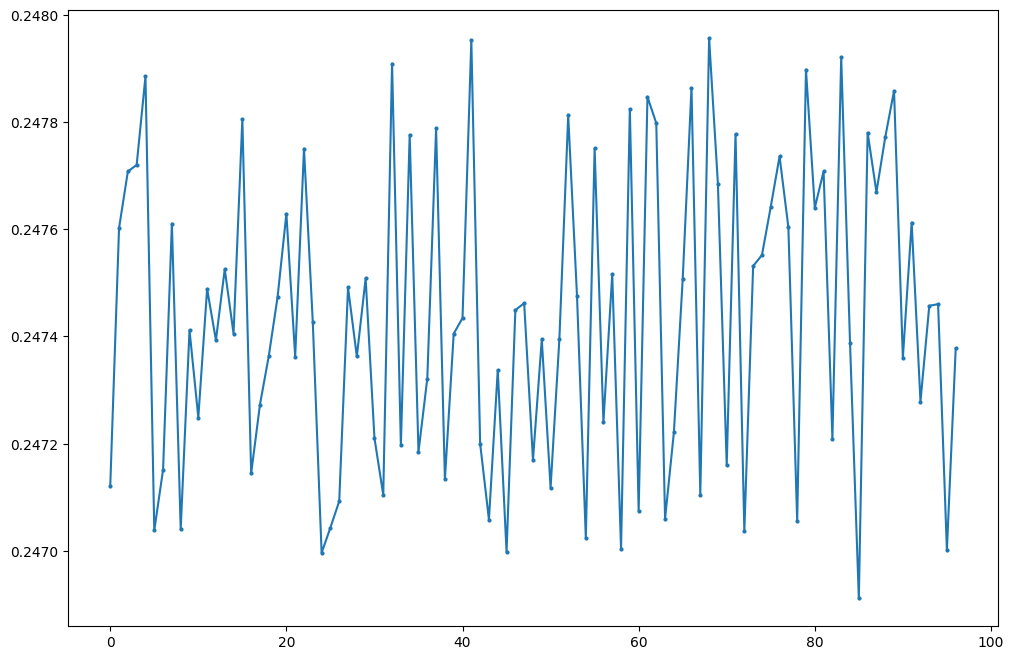

In [15]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(num=None,figsize=(12,8),facecolor='w',edgecolor='k')
plt.plot(rend[1:-1],marker='o',markersize = 2)
plt.show()

In [16]:
# Criando um dashboard simples
import plotly.graph_objects as go
import plotly.express as px

#  Create traces
fig = go.Figure()
# Plotando
fig.update_layout(title='Eficiência do ciclo',xaxis_range=[0,99], yaxis_range=[0.24,0.25])
# Ponto de operação atual
fig.add_trace(go.Scatter(x=dados_rend['Time'],y=dados_rend['Rendimento'],customdata=dados['P3'],
                         mode='markers',marker=dict(size=12,color='rgba(255, 0, 0, 0.5)',line=dict(width=2,
                         color='rgba(255, 0, 0, 0.5)'),symbol='diamond'),
                         hoverinfo = 'text',
                         hovertemplate = 'Rendimento: %{y:.3f}, ' + 'P6 = ' + ' %{customdata:.3f} bar',
                         name='Rendimento'))


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'customdata': array(['bar', '29.77696395', '30.16273006', '30.21785737', '30.16557092',
                                   '30.23049438', '29.75164505', '29.79518967', '30.0904155',
                                   '29.84260984', '29.98912729', '29.86313525', '30.0108506',
                                   '29.96389363', '30.06042719', '30.03706052', '30.14753314',
                                   '29.84259746', '29.96039185', '29.9895522', '30.05273716',
                                   '30.14685025', '29.97390591', '30.14403423', '30.06169896',
                                   '29.8035826', '29.85689522', '29.78004019', '29.98301453',
                                   '30.02201458', '30.09703201', '29.82939888', '29.8356024',
                                   '30.19599233', '29.82379324', '30.14831543', '29.86571818',
                                   '29.90166948', '30.1435313', '29.88184883', '30.02461028',
                                   '29.98097873', '30.2303088', '29.8569875', '29.81798168', '29.97406549',
                                   '29.79415514', '29.9736564', '29.98818891', '29.91985938',
                                   '29.95791397', '29.87921006', '29.92386604', '30.14097111',
                                   '29.96687935', '29.8214578', '30.14037481', '29.85337056',
                                   '30.06994983', '29.81618824', '30.22850803', '29.87826484', '30.235868',
                                   '30.24829948', '29.80895856', '29.95985116', '30.01146217',
                                   '30.18127253', '29.848579', '30.24126541', '30.21359422', '29.8528547',
                                   '30.20513027', '29.77933716', '30.02355516', '30.06951029',
                                   '30.19084166', '30.18898838', '30.07136217', '29.77264641',
                                   '30.22615611', '30.10951623', '30.12425549', '29.85091124',
                                   '30.23636732', '29.90960951', '29.7878335', '30.13642538',
                                   '30.10509337', '30.1938402', '30.19834435', '29.93553265',
                                   '30.07663148', '29.94607562', '30.02247603', '30.09283692',
                                   '29.82073092', '29.97512316', '30.12794103'], dtype=object),
              'hoverinfo': 'text',
              'hovertemplate': 'Rendimento: %{y:.3f}, P6 =  %{customdata:.3f} bar',
              'marker': {'color': 'rgba(255, 0, 0, 0.5)',
                         'line': {'color': 'rgba(255, 0, 0, 0.5)', 'width': 2},
                         'size': 12,
                         'symbol': 'diamond'},
              'mode': 'markers',
              'name': 'Rendimento',
              'type': 'scatter',
              'x': array(['dd:mm:aaaa hh:mm', '14/05/2025 14:30:00', '14/05/2025 14:31:00',
                          '14/05/2025 14:32:00', '14/05/2025 14:33:00', '14/05/2025 14:34:00',
                          '14/05/2025 14:35:00', '14/05/2025 14:36:00', '14/05/2025 14:37:00',
                          '14/05/2025 14:38:00', '14/05/2025 14:39:00', '14/05/2025 14:40:00',
                          '14/05/2025 14:41:00', '14/05/2025 14:42:00', '14/05/2025 14:43:00',
                          '14/05/2025 14:44:00', '14/05/2025 14:45:00', '14/05/2025 14:46:00',
                          '14/05/2025 14:47:00', '14/05/2025 14:48:00', '14/05/2025 14:49:00',
                          '14/05/2025 14:50:00', '14/05/2025 14:51:00', '14/05/2025 14:52:00',
                          '14/05/2025 14:53:00', '14/05/2025 14:54:00', '14/05/2025 14:55:00',
                          '14/05/2025 14:56:00', '14/05/2025 14:57:00', '14/05/2025 14:58:00',
                          '14/05/2025 14:59:00', '14/05/2025 15:00:00', '14/05/2025 15:01:00',
                          '14/05/2025 15:02:00', '14/05/2025 15:03:00', '14/05/2025 15:04:00',
                          '14/05/2025 15:05:00', '14/05/2025 15:06:00', '14/05/2025 15:07:00',


In [ ]:
# Gera o Dash

x = .1
fig = px.bar(dados_rend, x='Time', y='Rendimento', range_y=[0.24,0.25], color=None)
fig.show()

from dash import Dash, dcc, html
import plotly.express as px 
app = Dash(__name__)
fig = px.scatter(dados_rend,x = Time, y = Rendimento, range_y=[0.24,0.25], color = None)
app.layout = html.Div(style={fontSize 28px, color blue},children=[html.H1(children='Dashboard do Ciclo Térmico'),
html.Div(children='''
Gráfico de eficiência térmica
'''),

dcc.Graph(id='Trend do rendimento', figure=fig)])

if __name__ == '__main__'
    app.run_server(debug=False)


SyntaxError: invalid decimal literal (1647159842.py, line 11)